# Installations

In [1]:
! pip install pandas
! pip install numpy
! pip install matplotlib
! pip install nltk
! pip install scikit-learn

  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


# Import libraries

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

In [3]:
# Download necessary tools from NLTK
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\sadiq\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sadiq\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sadiq\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Data Exploration and Visualization

### Load data 

In [4]:
train = pd.read_csv('train.csv')

### Exploration

In [5]:
train.head()

,overall,Review
0,5,This a really cool (but time-tested) design. T...
1,5,I liked the first pair so well I bought severa...
2,4,I took them to the range to put them to the te...
3,5,What can you say about a yoga block? These ar...
4,5,After reading many reviews I decided on this l...


In [6]:
train.describe()

,overall
count,222243.000000
mean,4.394771
std,0.985039
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222243 entries, 0 to 222242
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   overall  222243 non-null  int64 
 1   Review   222243 non-null  object
dtypes: int64(1), object(1)
memory usage: 3.4+ MB


In [8]:
train.loc[2]

overall                                                    4
Review     I took them to the range to put them to the te...
Name: 2, dtype: object

In [9]:
train.loc[2, 'overall']

4

In [10]:
totalCount = train['overall'].count()
print('Total number of reviews/ratings: ', totalCount)

Total number of reviews/ratings:  222243


In [11]:
count5 = train[train['overall']==5]['overall'].count()
count4 = train[train['overall']==4]['overall'].count()
count3 = train[train['overall']==3]['overall'].count()
count2 = train[train['overall']==2]['overall'].count()
count1 = train[train['overall']==1]['overall'].count()

print('Total number of reviews with 5 star rating: ', count5)
print('Total number of reviews with 4 star rating: ', count4)
print('Total number of reviews with 3 star rating: ', count3)
print('Total number of reviews with 2 star rating: ', count2)
print('Total number of reviews with 1 star rating: ', count1)

count5+count4+count3+count2+count1==totalCount

Total number of reviews with 5 star rating:  141169
Total number of reviews with 4 star rating:  48748
Total number of reviews with 3 star rating:  17947
Total number of reviews with 2 star rating:  7650
Total number of reviews with 1 star rating:  6729


True

In [12]:
percent5 = format((count5/totalCount)*100, '.2f')
percent4 = format((count4/totalCount)*100, '.2f')
percent3 = format((count3/totalCount)*100, '.2f')
percent2 = format((count2/totalCount)*100, '.2f')
percent1 = format((count1/totalCount)*100, '.2f')

print('Percentage of reviews with 5 star rating: ', percent5)
print('Percentage of reviews with 4 star rating: ', percent4)
print('Percentage of reviews with 3 star rating: ', percent3)
print('Percentage of reviews with 2 star rating: ', percent2)
print('Percentage of reviews with 1 star rating: ', percent1)

Percentage of reviews with 5 star rating:  63.52
Percentage of reviews with 4 star rating:  21.93
Percentage of reviews with 3 star rating:  8.08
Percentage of reviews with 2 star rating:  3.44
Percentage of reviews with 1 star rating:  3.03


### Visualization

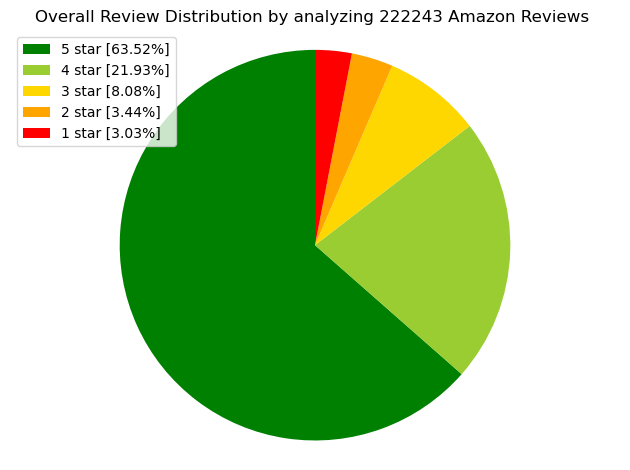

In [13]:
## Print the Pie Chart ##
    
labels = ['5 star ['+str(percent5)+'%]', 
          '4 star ['+str(percent4)+'%]', 
          '3 star ['+str(percent3)+'%]',
          '2 star ['+str(percent2)+'%]',
          '1 star ['+str(percent1)+'%]', ]

sizes = [percent5, percent4, percent3, percent2, percent1]
colors = ['green', 'yellowgreen', 'gold', 'orange', 'red']
patches, texts = plt.pie(sizes, colors = colors, startangle = 90)
plt.legend(patches, labels, loc = "best")
plt.title("Overall Review Distribution by analyzing " + str(totalCount) + " Amazon Reviews ")
plt.axis('equal')
plt.tight_layout()
plt.show()

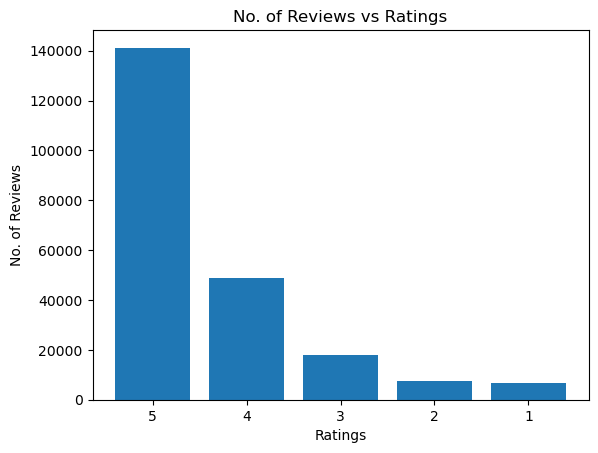

In [14]:
# data to plot
labels = ['5', '4', '3', '2', '1']
values = [count5, count4, count3, count2, count1]

# create a bar chart
plt.bar(labels, values)

# set title and axis labels
plt.title('No. of Reviews vs Ratings')
plt.xlabel('Ratings')
plt.ylabel('No. of Reviews')

# display the plot
plt.show()

# Text processing and Normalization

In [15]:
X = train['Review']
y = train['overall']

In [16]:
X.head()

0    This a really cool (but time-tested) design. T...
1    I liked the first pair so well I bought severa...
2    I took them to the range to put them to the te...
3    What can you say about a yoga block?  These ar...
4    After reading many reviews I decided on this l...
Name: Review, dtype: object

In [17]:
y.head()

0    5
1    5
2    4
3    5
4    5
Name: overall, dtype: int64

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2, random_state=42)

In [29]:
X_train.shape

(177794,)

### Removing stop words, punctuations, Urls, mentions, tags

In [19]:
# Define function to perform text processing
def process_text(text):

# Define stop words
    stop_words = set(stopwords.words('english'))

    # Define regular expression for removing punctuation
    punct_pattern = re.compile(r'[^\w\s]')

    # Define regular expression for removing URLs and mentions
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    mention_pattern = re.compile(r'@[A-Za-z0-9_]+')
    hash_pattern = re.compile(r'#[A-Za-z0-9_]+')

    # Convert text to lowercase
    text = text.lower()

    # Remove URLs
    text = url_pattern.sub('', text)

    # Remove user mentions
    text = mention_pattern.sub('', text)

    # Remove hashtags
    text = hash_pattern.sub('', text)

    # remove numbers
    text = ''.join((z for z in text if not z.isdigit()))
    
    # Tokenize text
    tokens = nltk.word_tokenize(text)
    
    # Remove stop words
    tokens = [token for token in tokens if token not in stop_words]
    
    # Remove punctuation
    tokens = [punct_pattern.sub('', token) for token in tokens]
    
    # Remove any remaining empty tokens
    tokens = [token for token in tokens if token]

    # Join tokens back into a single string
    text_processed = ' '.join(tokens)
    
    return text_processed

In [30]:
process_train = []
for review in X_train:
    process_train.append(process_text(review))

len(process_train)

177794

In [31]:
print("Raw text: ")
print(X_train.iloc[0])
print("")
print("Processed text: ")
print(process_train[0])

Raw text: 
Not very clear in the pictures but the top area just over the head is a camo portion that is pretty corny looking.  its the &#34;old school&#34; type of camo.  Other than that its a net and not much more to say. Pretty good for the price.

Processed text: 
clear pictures top area head camo portion pretty corny looking old school type camo net much say pretty good price


### Stemming

In [32]:
stemmer = SnowballStemmer('english')



def stem(text):

    # Tokenize text
    tokens = nltk.word_tokenize(text)
        
    # Stem words
    tokens = [stemmer.stem(token) for token in tokens]
    
    # Remove any remaining empty tokens
    tokens = [token for token in tokens if token]

    # Join tokens back into a single string
    text_processed = ' '.join(tokens)

    return text_processed


In [33]:
normalized_process_train_stem = []

for review in process_train:
    normalized_process_train_stem.append(stem(review))

### Lemmatization

In [24]:
lemmatizer = WordNetLemmatizer()

def lemmatize(text):
            
    # Tokenize text
    tokens = nltk.word_tokenize(text)
        
    # Stem words
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Remove any remaining empty tokens
    tokens = [token for token in tokens if token]

    # Join tokens back into a single string
    text_processed = ' '.join(tokens)

    return text_processed

In [25]:
lemma_process_train = []
for review in process_train:
    lemma_process_train.append(lemmatize(review))

In [34]:
print("Raw text: ")
print(X_train.iloc[0])
print("")
print("Processed text: ")
print(process_train[0])
print("")
print("Processed Stemming text: ")
print(normalized_process_train_stem[0])
print("")
print("Processed Lemmatized text: ")
print(lemma_process_train[0])

Raw text: 
Not very clear in the pictures but the top area just over the head is a camo portion that is pretty corny looking.  its the &#34;old school&#34; type of camo.  Other than that its a net and not much more to say. Pretty good for the price.

Processed text: 
clear pictures top area head camo portion pretty corny looking old school type camo net much say pretty good price

Processed Stemming text: 
clear pictur top area head camo portion pretti corni look old school type camo net much say pretti good price

Processed Lemmatized text: 
clear picture top area head camo portion pretty corny looking old school type camo net much say pretty good price


In [56]:
test=pd.read_csv('test.csv') # submission of majority class 

In [64]:
final_submission=pd.read_csv('sample_submission.csv')

In [58]:
test_final = test['Review']

In [59]:
process_test_final = []
for review in test_final:
    process_test_final.append(process_text(review))

In [60]:
lemma_process_test_final = []
for review in process_test_final:
    lemma_process_test_final.append(lemmatize(review))

# Vector space Model and feature representation

### Bag of words representation

In [41]:
# CountVectorizer object
vect =  CountVectorizer(min_df=15) 
vect.fit(lemma_process_train)
print("Vocabulary size: {}".format(len(vect.vocabulary_)))

Vocabulary size: 13754


In [42]:
bag_of_words = vect.transform(lemma_process_train)
bag_of_words

<177794x13754 sparse matrix of type '<class 'numpy.int64'>'
	with 6366511 stored elements in Compressed Sparse Row format>

In [43]:
process_test = []
for review in X_test:
    process_test.append(process_text(review))

In [44]:
lemma_process_test = []
for review in process_test:
    lemma_process_test.append(lemmatize(review))

##### Logistic regression

In [45]:
# Train and evaluate a logistic regression classifier
lr = LogisticRegression(max_iter=1000)
lr.fit(bag_of_words, y_train)
lr_pred = lr.predict(vect.transform(lemma_process_test))
precision_lr = precision_score(y_test, lr_pred, average='macro')
recall_lr = recall_score(y_test, lr_pred, average='macro')
f1_lr = f1_score(y_test, lr_pred, average='macro')
acc_lr = f1_score(y_test, lr_pred, average='macro')


c:\Users\sadiq\anaconda3\envs\tensorProject\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
print('Logistic Regression: ')
print('Precision: {:.2f}'.format(precision_lr))
print('Recall: {:.2f}'.format(recall_lr))
print('F1-score: {:.2f}'.format(f1_lr))
print('Accuracy: {:.2f}'.format(acc_lr))

Logistic Regression: 
Precision: 0.48
Recall: 0.42
F1-score: 0.44
Accuracy: 0.44


Hyper-parameter tuning

In [51]:
# define your logistic regression model
lr_cv = LogisticRegression()

# define the hyperparameters you want to tune and their range of values
hyperparameters = {
    'C': uniform(loc=0, scale=4),
    'penalty': ['l1', 'l2']
}

# define your hyperparameter tuning process
clf = RandomizedSearchCV(
    lr_cv, 
    hyperparameters, 
    n_iter=100, 
    cv=5, 
    random_state=42, 
    n_jobs=-1
)

# fit the hyperparameter tuning process to your data
clf.fit(bag_of_words, y_train)

# get the best hyperparameters and the best score achieved
best_params = clf.best_params_
best_score = clf.best_score_



c:\Users\sadiq\anaconda3\envs\tensorProject\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
215 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
215 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\sadiq\anaconda3\envs\tensorProject\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\sadiq\anaconda3\envs\tensorProject\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\sadiq\anaconda3\envs\tensorProject\lib\site-packages\sklearn\li

TypeError: sklearn.linear_model._logistic.LogisticRegression() argument after ** must be a mapping, not numpy.float64

In [53]:
# create a new logistic regression model with the best hyperparameters
best_lr = LogisticRegression(**best_params)

# train the model with the entire training set
best_lr.fit(bag_of_words, y_train)

lr_pred_best = best_lr.predict(vect.transform(lemma_process_test))
precision_lr_best = precision_score(y_test, lr_pred_best, average='macro')
recall_lr_best = recall_score(y_test, lr_pred_best, average='macro')
f1_lr_best = f1_score(y_test, lr_pred_best, average='macro')
acc_lr_best = accuracy_score(y_test, lr_pred_best)

c:\Users\sadiq\anaconda3\envs\tensorProject\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
print('Logistic Regression CV: ')
print('Precision: {:.2f}'.format(precision_lr_best))
print('Recall: {:.2f}'.format(recall_lr_best))
print('F1-score: {:.2f}'.format(f1_lr_best))
print('Accuracy: {:.2f}'.format(acc_lr_best))

Logistic Regression CV: 
Precision: 0.51
Recall: 0.42
F1-score: 0.45
Accuracy: 0.70


In [62]:
y_final = best_lr.predict(vect.transform(lemma_process_test_final))

In [65]:
final_submission['overall'] = y_final # save the labels for your model to csv file, you willl use this for you Kaggle competition submission

final_submission.to_csv('final_submission.csv', index=False)

##### Naive Bayes

In [ ]:
# Train and evaluate a Naive Bayes classifier
# nb = MultinomialNB()
# nb.fit(X_train, y_train)
# y_pred_nb = nb.predict(X_test)
# precision_nb = precision_score(y_test, y_pred_nb, average='macro')
# recall_nb = recall_score(y_test, y_pred_nb, average='macro')
# f1_nb = f1_score(y_test, y_pred_nb, average='macro')

### Tf-idf vectorization

In [22]:
vectorizer = TfidfVectorizer(min_df=15)

tfidf_representation_train = vectorizer.fit_transform(lemma_process_train)

# Convert the sparse matrix to a dense matrix and print the output
# temp_df = pd.DataFrame(tfidf_representation.todense(), columns=vectorizer.get_feature_names())
# print(temp_df)

In [53]:
X_train_train, X_train_test, y_train_train, y_train_test = train_test_split(tfidf_representation_train, y_train, test_size=0.2, random_state=42)

In [55]:
# Train and evaluate a logistic regression classifier
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_train, y_train_train)
lr_pred = lr.predict(X_train_test)
precision_lr = precision_score(y_train_test, lr_pred, average='macro')
recall_lr = recall_score(y_train_test, lr_pred, average='macro')
f1_lr = f1_score(y_train_test, lr_pred, average='macro')
acc_lr = f1_score(y_train_test, lr_pred, average='macro')


In [57]:
print('Logistic Regression: ')
print('Precision: {:.2f}'.format(precision_lr))
print('Recall: {:.2f}'.format(recall_lr))
print('F1-score: {:.2f}'.format(f1_lr))
print('Accuracy: {:.2f}'.format(acc_lr))

Logistic Regression: 
Precision: 0.54
Recall: 0.41
F1-score: 0.45
Accuracy: 0.45


In [21]:
test = pd.read_csv('test.csv')

In [24]:
test.head()

,id,Review
0,0,Bought for a Smith and Wesson M&P15 fits perfe...
1,1,Beware of the charts listed on Butler Creek's ...
2,2,I've only used this once to sight in a scope. ...
3,3,I need more of these!!! This thing makes shoot...
4,4,Grabber Outdoors Original Space Brand Sportsma...


In [22]:
X_test = vectorizer.transform(test['Review'])

NameError: name 'vectorizer' is not defined

In [26]:
lr = LogisticRegression()
lr.fit(tfidf_representation_train, y_train)

c:\Users\sadiq\anaconda3\envs\tensorProject\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
y_test = lr.predict(X_test) 

In [29]:
sample.head()

,id,overall
0,0,3
1,1,5
2,2,5
3,3,4
4,4,5


In [30]:
y_test[:5]

array([5, 5, 4, 5, 5], dtype=int64)

In [31]:
print("Test set score:{:.2f}".format(np.mean(y_test==sample.overall)))

Test set score:0.20


In [73]:
sample['overall'] = y_test # save the labels for your model to csv file, you willl use this for you Kaggle competition submission

sample.to_csv('final_submission.csv', index=False)

In [33]:
# define your logistic regression model
lr = LogisticRegression()

# define the hyperparameters you want to tune and their range of values
hyperparameters = {
    'C': uniform(loc=0, scale=4),
    'penalty': ['l1', 'l2']
}

# define your hyperparameter tuning process
clf = RandomizedSearchCV(
    lr, 
    hyperparameters, 
    n_iter=100, 
    cv=5, 
    random_state=42, 
    n_jobs=-1
)

# fit the hyperparameter tuning process to your data
clf.fit(tfidf_representation_train, y_train)

# get the best hyperparameters and the best score achieved
best_params = clf.best_params_
best_score = clf.best_score_

# create a new logistic regression model with the best hyperparameters
best_lr = LogisticRegression(**best_params)

# train the model with the entire training set
best_lr.fit(tfidf_representation_train, y_train)


c:\Users\sadiq\anaconda3\envs\tensorProject\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
215 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
215 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\sadiq\anaconda3\envs\tensorProject\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\sadiq\anaconda3\envs\tensorProject\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\sadiq\anaconda3\envs\tensorProject\lib\site-packages\sklearn\li

LogisticRegression(C=0.7337391594646552)

In [34]:
y_best_test = best_lr.predict(X_test)

In [35]:
print("Best Test set score:{:.2f}".format(np.mean(y_best_test==sample.overall)))

Best Test set score:0.20


In [82]:
sample['overall'] = y_best_test # save the labels for your model to csv file, you willl use this for you Kaggle competition submission

sample.to_csv('final_submission.csv', index=False)

In [23]:
reviews = train['Review'].tolist()

reviews[:5]

["This a really cool (but time-tested) design. The carbon steel blade gets really sharp but does require maintenance from time to time. I oiled the locking screw-top and blade; after that it opens easily. I've been using mine for a couple of months now and am not disappointed. It's a solid knife and at an affordable price. Nice knife!",
 "I liked the first pair so well I bought several more. I have found it's usually worthwhile to buy the higher priced products in the long run and these socks are no exception. Better comfort, moisture wicking, arch support, etc. My go to sock in hot weather. I use these road, cx, & single track cycling Excellent",
 "I took them to the range to put them to the test. When you adjust the volume you can hear people talking without a problem and the shots are muffled. I tried them today mowing the lawn while having my music going. The sound of the music was really good. I was a little shocked.  Overall a great buy. I just ordered a second set for my wife. I

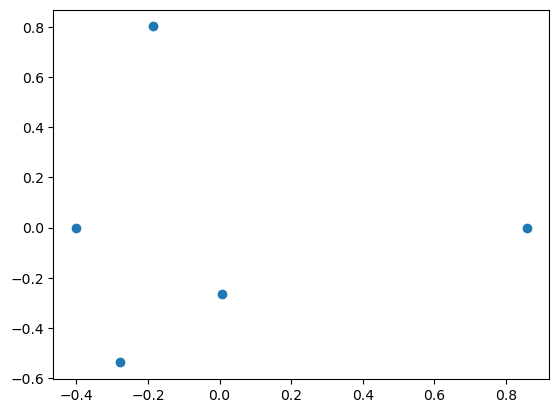

In [24]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Create TfidfVectorizer object with bigram feature extraction
vectorizer = TfidfVectorizer(ngram_range=(2, 2))

# Fit the vectorizer to the text data and transform the text data into bigram tf-idf features
bigram_tfidf_features = vectorizer.fit_transform(reviews[:5])

# Print the bigram tf-idf features                                                                                                              
# print(bigram_tfidf_features.toarray())

# Convert the sparse matrix to a dense matrix and print the output
# df = pd.DataFrame(bigram_tfidf_features.todense(), columns=vectorizer.get_feature_names())
# print(df)

# Apply PCA to reduce the dimensionality of the feature space to two dimensions
pca = PCA(n_components=2)
bigram_tfidf_features_pca = pca.fit_transform(bigram_tfidf_features.toarray())

# Plot the data points on a scatter plot
plt.scatter(bigram_tfidf_features_pca[:, 0], bigram_tfidf_features_pca[:, 1])
plt.show()

In [25]:
! pip install mglearn
! pip install joblib==1.1.0

     ------------------------------------- 540.1/540.1 kB 11.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 3.4/3.4 MB 17.9 MB/s eta 0:00:00
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582621 sha256=770f9e98d03336a147cc63abff433644eecb8b620b2611f03e8e209b12176fa1
  Stored in directory: c:\users\sadiq\appdata\local\pip\cache\wheels\df\30\8a\1e2c8f144c9d411b0688f628d496d2db8f61b6d14bcedaa1df
Successfully built mglearn
     -------------------------------------- 307.0/307.0 kB 9.6 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-learn 1.2.2 requires joblib>=1.1.1, but you have joblib 1.1.0 which is incompatible.


In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
import mglearn as mglearn

pipe = make_pipeline(TfidfVectorizer(min_df=5),
                     LogisticRegression())

param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(pipe, param_grid, cv=5)

grid.fit(X_train, y_train)

vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]

feature_names = np.array(vectorizer.get_feature_names_out())




mglearn.tools.visualize_coefficients(
    grid.best_estimator_.named_steps["logisticregression"].coef_,
    feature_names, n_top_features=40)

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>
